In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
import astropy.units as u
import astropy.constants as co
import pandas as pd
from numpy.polynomial.polynomial import polyfit
from scipy.stats import binned_statistic

In [2]:
plt.style.use('ggplot')

In [3]:
dtm = pd.read_excel('./SL19-1(2).xlsx')

In [4]:
B=dtm['B_0 (kG)']
f=dtm['f_res (MHz)']

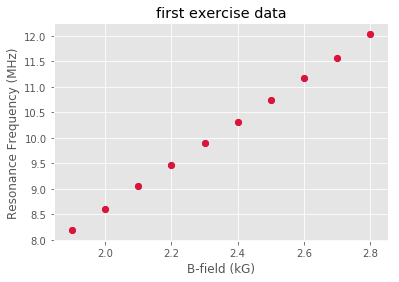

In [5]:
plt.scatter(B,f, c='Crimson')
plt.xlabel('B-field (kG)')
plt.ylabel('Resonance Frequency (MHz)')
plt.title('first exercise data')
plt.savefig('./firstexercise.png');

In [6]:
b_1,m_1 = polyfit(B,f,deg=1)

In [7]:
m_1, b_1

(4.255950786809805, 0.09992932405959513)

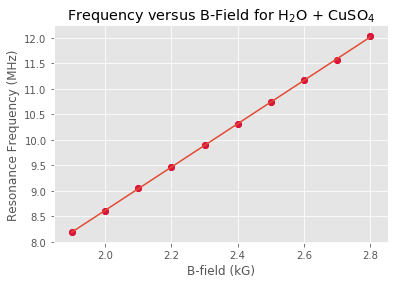

In [11]:
plt.scatter(B,f, c='Crimson')
plt.plot(B, m_1*B+b_1)
plt.xlabel('B-field (kG)')
plt.ylabel('Resonance Frequency (MHz)')
plt.title('Frequency versus B-Field for H$_2$O + CuSO$_4$')
plt.savefig('firstexercisewithfit');

In [12]:
print('{0:.4f} MHz/kG'.format(m_1))

4.2560 MHz/kG


In [13]:
tree=pd.read_excel('./SL19-1(2).xlsx', sheet_name=2)

In [14]:
B3=tree['B(kG)']
f3_1=tree['f_p (MHz)']
f3_2=tree['f_F (MHz)']

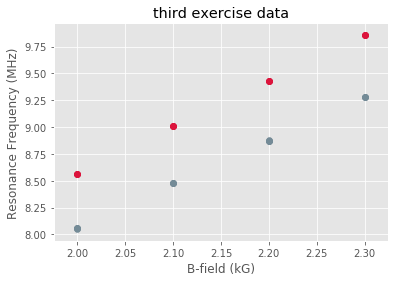

In [15]:
plt.scatter(B3,f3_1, c='Crimson')
plt.scatter(B3,f3_2, c='xkcd:Bluish Grey')
plt.xlabel('B-field (kG)')
plt.ylabel('Resonance Frequency (MHz)')
plt.title('third exercise data')
plt.savefig('./thirdexercise.png');

In [16]:
b_a,m_a = polyfit(B3, f3_1, 1)
b_b, m_b = polyfit(B3, f3_2, 1)

In [17]:
m_a, m_b

(4.30794605599999, 4.047901399999995)

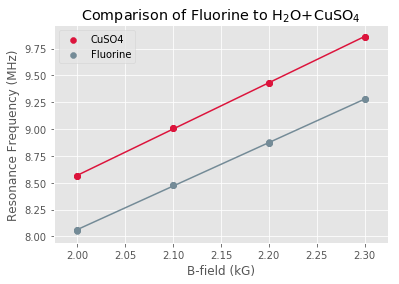

In [18]:
plt.scatter(B3,f3_1, c='Crimson', label="CuSO4")
plt.scatter(B3,f3_2, c='xkcd:Bluish Grey', label="Fluorine")
plt.legend()
plt.plot(B3, b_a+m_a*B3, c='Crimson', label=None)
plt.plot(B3, b_b+m_b*B3, c='xkcd:Bluish Grey', label=None)
plt.xlabel('B-field (kG)')
plt.ylabel('Resonance Frequency (MHz)')
plt.title('Comparison of Fluorine to H$_2$O+CuSO$_4$')
plt.savefig('./thirdexerciseconlosfits.png');

Getting some standard deviations

In [16]:
plt.legend?

In [17]:
bin_stds = binned_statistic(B, f, statistic='std', bins=10, range=None)
bin_stds

BinnedStatisticResult(statistic=array([0.00047754, 0.0002014 , 0.00097355, 0.00082332, 0.00027639,
       0.00429431, 0.00021265, 0.00024924, 0.001349  , 0.00324054]), bin_edges=array([1.9 , 1.99, 2.08, 2.17, 2.26, 2.35, 2.44, 2.53, 2.62, 2.71, 2.8 ]), binnumber=array([ 1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,
        7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10]))

In [18]:
bin_stds[2], bin_stds[1]

(array([ 1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  4,  4,
         4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,
         7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10]),
 array([1.9 , 1.99, 2.08, 2.17, 2.26, 2.35, 2.44, 2.53, 2.62, 2.71, 2.8 ]))

In [19]:
bin_stds[0]*10**(3)

array([0.47753913, 0.20139749, 0.97354667, 0.8233151 , 0.27638671,
       4.29431321, 0.21264755, 0.24923567, 1.34899918, 3.24053976])

In [20]:
# third exercise CuSO4

bin_stds = binned_statistic(B3, f3_1, statistic='std', bins=4, range=None)
bin_stds[0]

array([0.00293141, 0.00015621, 0.0002567 , 0.00060387])

In [22]:
bin_means = binned_statistic(B3, f3_1, statistic='mean', bins=4, range=None)
bin_means[0]

array([8.56420665, 9.00879   , 9.432332  , 9.859008  ])

In [21]:
# fluorine

bin_stds = binned_statistic(B3, f3_2, statistic='std', bins=4, range=None)
bin_stds[0]

array([0.00339296, 0.00010651, 0.0003311 , 0.00021039])

In [23]:
bin_means = binned_statistic(B3, f3_2, statistic='mean', bins=4, range=None)
bin_means[0]

array([8.0601742, 8.476274 , 8.874766 , 9.276644 ])